<a href="https://colab.research.google.com/github/EricAndradeNJIT/data-analytics-folder/blob/main/Logistic_Regression_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload file from computer

from google.colab import files
cancer = files.upload()

Saving cancer.csv to cancer.csv


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression


In [10]:
#read/rename file, print observations

cancer = pd.read_csv('cancer.csv')

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [14]:
#check number of records

print(cancer.shape)

(569, 12)


In [15]:
#convert diagnosis column into numeric type value

cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

In [16]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,cancer_present
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1.0


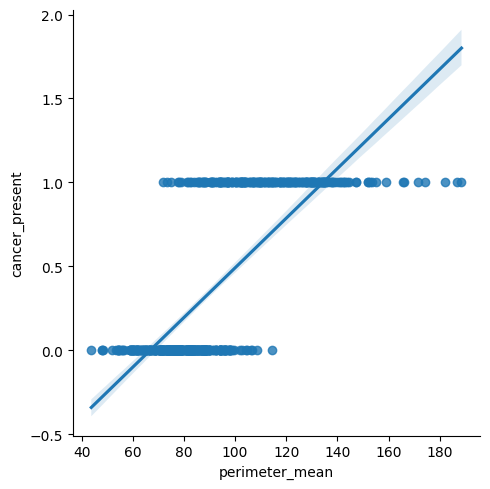

In [21]:
#use seaborn to plot perimeter mean and cancer present

sns.lmplot(data=cancer, x="perimeter_mean", y= "cancer_present")

In [22]:
#split data into features of interest

y = cancer[['cancer_present']]

X = cancer[['perimeter_mean']]

In [25]:
#split the data into a training/validation dataset and a test dataset

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train_val.shape)
print(X_test.shape)

(426, 1)
(143, 1)


In [27]:
#split the training/validation dataset into a training set and validation set.

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42)

print(X_train.shape)
print(X_val.shape)

(284, 1)
(142, 1)


In [28]:
#apply logistic regression

log_reg = LogisticRegression(random_state=0)

log_reg_model = log_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
#calculate accuracy

accuracy = log_reg_model.score(X_train, y_train)

print(accuracy)

0.8908450704225352


In [38]:
#calculate probabilty

probs_ = log_reg_model.predict_proba(X_train)

probs = pd.DataFrame(probs_)

print(probs.head())

          0         1
0  0.878251  0.121749
1  0.183882  0.816118
2  0.986293  0.013707
3  0.540649  0.459351
4  0.000414  0.999586


In [44]:
#calculate using predict

classes_ = log_reg_model.predict(X_train)

classes = pd.DataFrame(classes_)

print(classes_)
print(classes_.shape)

[0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
(284,)


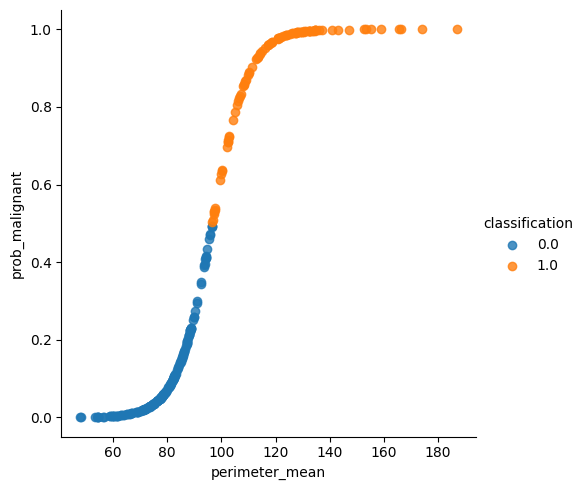

In [48]:
X_train.reset_index(inplace=True)

predicted = pd.concat([X_train,probs[1], classes],axis=1)

predicted.rename({1: 'prob_malignant', 0:'classification'}, axis=1, inplace=True)


sns.lmplot(data=predicted, x="perimeter_mean", y="prob_malignant", hue ='classification', fit_reg=False)

Perimeter mean is a good estimator to predict presence of breast cancer.

In [46]:
print(predicted)

     index  perimeter_mean  prob_malignant  classification
0      143           83.74        0.121749             0.0
1      375          106.30        0.816118             1.0
2      166           68.77        0.013707             0.0
3       38           95.54        0.459351             0.0
4      272          147.30        0.999586             1.0
..     ...             ...             ...             ...
279     31           77.93        0.053726             0.0
280    348           73.02        0.026007             0.0
281    448           94.25        0.410679             0.0
282    295           88.06        0.212115             0.0
283    116           58.74        0.002967             0.0

[284 rows x 4 columns]
